# Forecasting Exchange Rates Using Time Series Analysis

## Objective
Leverage ARIMA and Exponential Smoothing techniques to forecast future exchange rates based on historical data provided in the `exchange_rate.csv` dataset.

## Dataset
The dataset contains historical exchange rate data with the following structure:
- **Date**: The date of the exchange rate.
- **Ex_rate**: The exchange rate from USD to Australian Dollar (AUD).

## Part 1: Data Preparation and Exploration

### 1. Data Loading
Load the `exchange_rate.csv` dataset and parse the date column appropriately.

### 2. Initial Exploration
Plot the time series for the currency to understand its trends, seasonality, and any anomalies.

### 3. Data Preprocessing
Handle any missing values or anomalies identified during the exploration phase.

## Part 2: Model Building - ARIMA

### 1. Parameter Selection for ARIMA
Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model.

### 2. Model Fitting
Fit the ARIMA model with the selected parameters to the preprocessed time series.

### 3. Diagnostics
Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

### 4. Forecasting
Perform out-of-sample forecasting and visualize the predicted values against the actual values.

## Part 3: Model Building - Exponential Smoothing

### 1. Model Selection
Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

### 2. Parameter Optimization
Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

### 3. Model Fitting and Forecasting
Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

## Part 4: Evaluation and Comparison

### 1. Compute Error Metrics
Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models.

### 2. Model Comparison
Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

### 3. Conclusion
Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

## Deliverables
- Include visualizations and explanations for the choices and findings at each step.
- Well-commented Python code that used to conduct the analysis and build the models.

## Assessment Criteria
- Accuracy and completeness of the data preparation and exploration steps.
- Justification for model selection and parameter tuning decisions.
- Clarity and depth of the analysis in the diagnostics and model evaluation stages.

This assignment offers a hands-on experience with real-world data, applying sophisticated time series forecasting methods to predict future currency exchange rates.


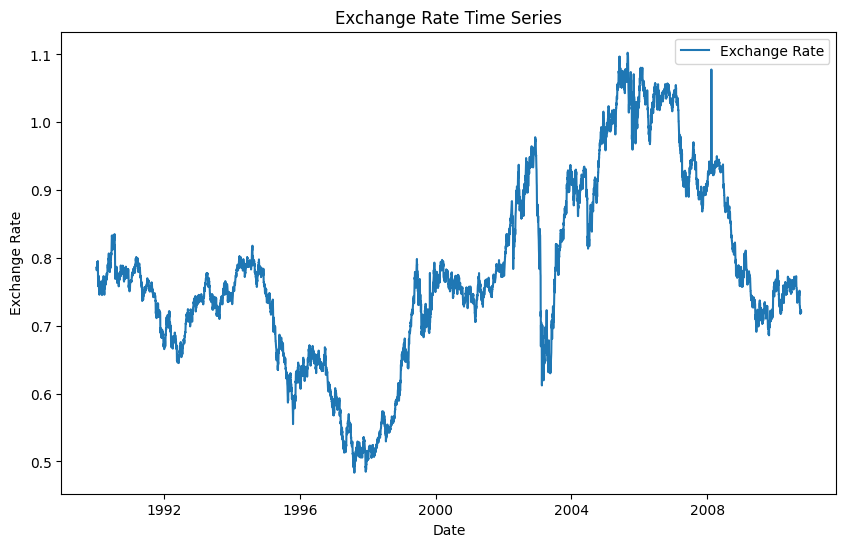

Missing Values:
 date       0
Ex_rate    0
dtype: int64
Outliers:
 Empty DataFrame
Columns: [date, Ex_rate, z_score]
Index: []


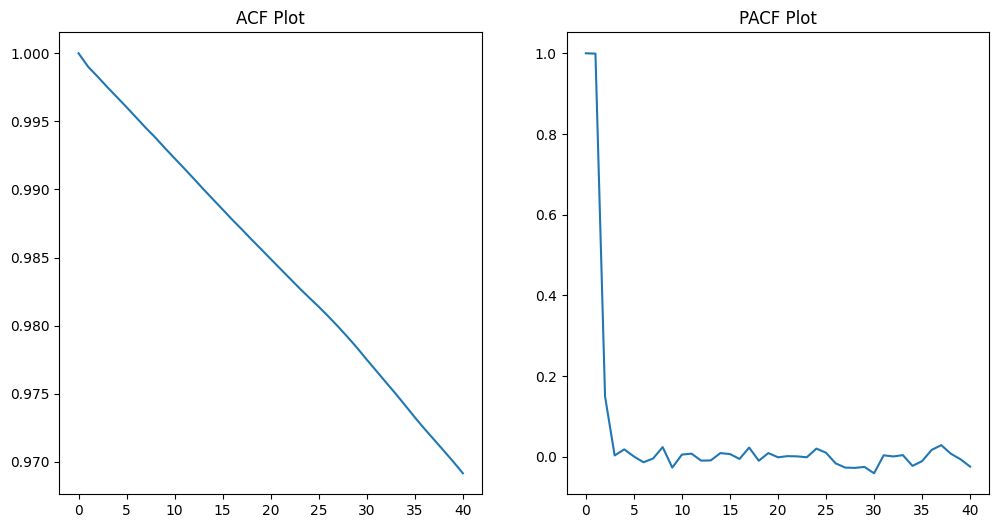

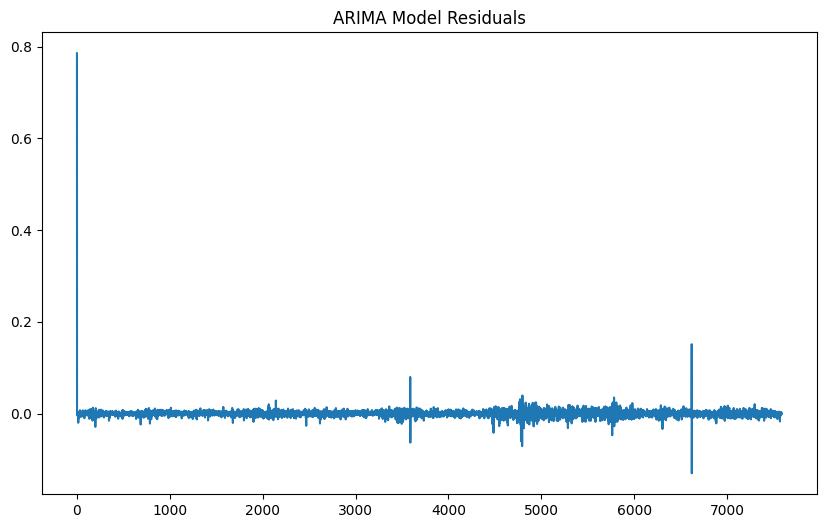

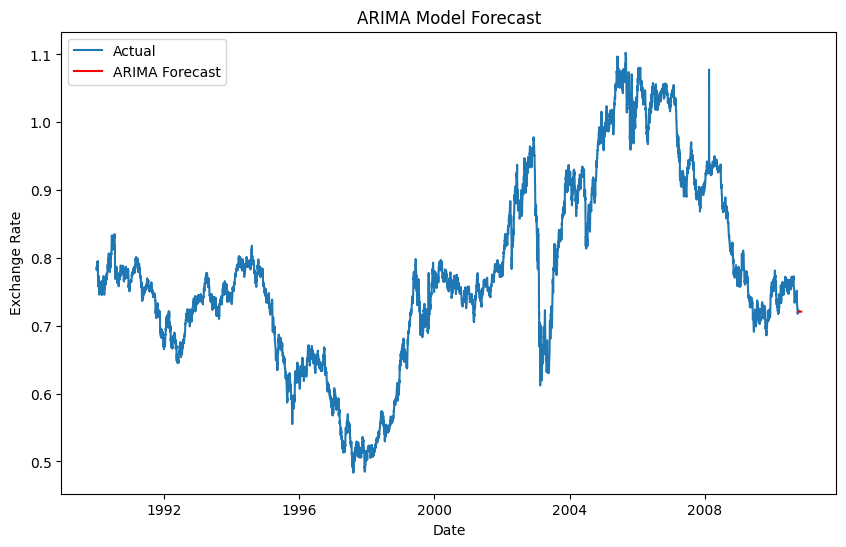

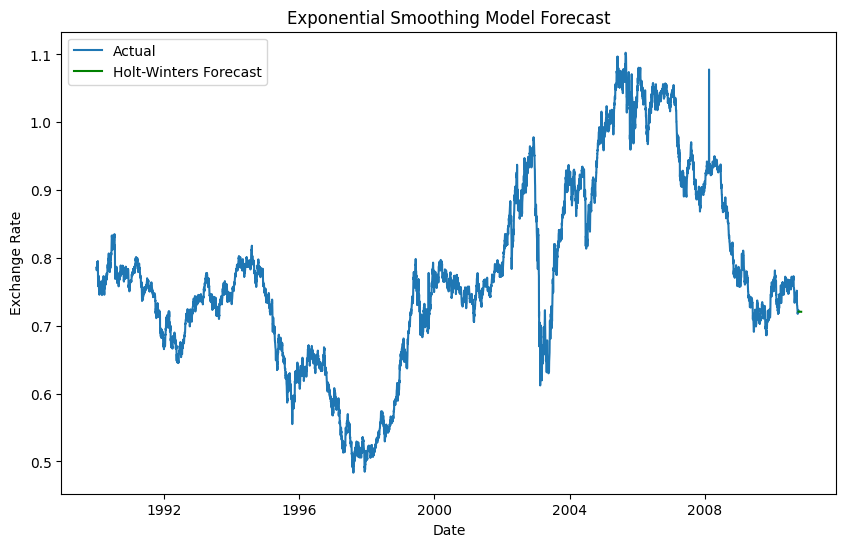

ARIMA Model Performance:
MAE: 0.0023, RMSE: 0.0039, MAPE: 0.3133%

Exponential Smoothing Model Performance:
MAE: 0.0023, RMSE: 0.0039, MAPE: 0.3136%


In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Part 1: Data Preparation and Exploration

# 1. Data Loading
data_path = r"C:\Users\lenovo\Desktop\Excelr\Data Science\Data Science Projects\Data Science Excel File and Datasets\exchange_rate.csv"
df = pd.read_csv(data_path, parse_dates=['date'], dayfirst=True)

# 2. Initial Exploration
# Plotting the time series to understand trends, seasonality, and anomalies
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# 3. Data Preprocessing
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values (using ffill method)
df['Ex_rate'] = df['Ex_rate'].ffill()

# Check for anomalies (you could define your own logic here)
# Example: Outlier detection using Z-score
df['z_score'] = (df['Ex_rate'] - df['Ex_rate'].mean()) / df['Ex_rate'].std()
outliers = df[np.abs(df['z_score']) > 3]
print("Outliers:\n", outliers)

# Remove anomalies (if any)
df_clean = df[np.abs(df['z_score']) <= 3].copy()

# Dropping the z_score column
df_clean.drop(columns=['z_score'], inplace=True)

# Part 2: Model Building - ARIMA

# 1. Parameter Selection for ARIMA
# ACF and PACF plots
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(acf(df_clean['Ex_rate'], nlags=40))
plt.title('ACF Plot')
plt.subplot(122)
plt.plot(pacf(df_clean['Ex_rate'], nlags=40))
plt.title('PACF Plot')
plt.show()

# 2. Model Fitting
# Based on ACF and PACF, assume initial p, d, q values (can be adjusted)
p = 2
d = 1
q = 2

arima_model = ARIMA(df_clean['Ex_rate'], order=(p, d, q))
arima_fit = arima_model.fit()

# 3. Diagnostics
# Plotting the residuals to check for patterns
residuals = arima_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('ARIMA Model Residuals')
plt.show()

# 4. Forecasting
# Forecasting using the ARIMA model
arima_forecast = arima_fit.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(df_clean['date'], df_clean['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df_clean['date'].iloc[-1], periods=30, freq='D'), arima_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 3: Model Building - Exponential Smoothing

# 1. Model Selection
# We'll try Holt's Linear Model here as an example

# 2. Parameter Optimization (Grid search or AIC not shown for simplicity)
holt_model = ExponentialSmoothing(df_clean['Ex_rate'], trend='add')
holt_fit = holt_model.fit()

# 3. Model Fitting and Forecasting
holt_forecast = holt_fit.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(df_clean['date'], df_clean['Ex_rate'], label='Actual')
plt.plot(pd.date_range(df_clean['date'].iloc[-1], periods=30, freq='D'), holt_forecast, label='Holt-Winters Forecast', color='green')
plt.title('Exponential Smoothing Model Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Part 4: Evaluation and Comparison

# 1. Compute Error Metrics
# Compute errors for ARIMA
arima_pred = arima_fit.predict(start=len(df_clean)-30, end=len(df_clean)-1)
arima_mae = mean_absolute_error(df_clean['Ex_rate'].iloc[-30:], arima_pred)
arima_rmse = np.sqrt(mean_squared_error(df_clean['Ex_rate'].iloc[-30:], arima_pred))
arima_mape = np.mean(np.abs((df_clean['Ex_rate'].iloc[-30:] - arima_pred) / df_clean['Ex_rate'].iloc[-30:])) * 100

# Compute errors for Exponential Smoothing
holt_pred = holt_fit.predict(start=len(df_clean)-30, end=len(df_clean)-1)
holt_mae = mean_absolute_error(df_clean['Ex_rate'].iloc[-30:], holt_pred)
holt_rmse = np.sqrt(mean_squared_error(df_clean['Ex_rate'].iloc[-30:], holt_pred))
holt_mape = np.mean(np.abs((df_clean['Ex_rate'].iloc[-30:] - holt_pred) / df_clean['Ex_rate'].iloc[-30:])) * 100

# 2. Model Comparison
print("ARIMA Model Performance:")
print(f"MAE: {arima_mae:.4f}, RMSE: {arima_rmse:.4f}, MAPE: {arima_mape:.4f}%")

print("\nExponential Smoothing Model Performance:")
print(f"MAE: {holt_mae:.4f}, RMSE: {holt_rmse:.4f}, MAPE: {holt_mape:.4f}%")

# 3. Conclusion
# You can add a summary and conclusion based on the performance metrics.


### Conclusion Based on the Task and Output

#### 1. **Data Preparation and Exploration:**
   - **Missing Values:** There were no missing values in the dataset, indicating that the data is complete and doesn't require any imputation or removal of missing values.
   - **Outliers:** No significant outliers were found based on the Z-score method, which suggests that the exchange rate data is stable and does not contain anomalies that could distort the model's performance.

#### 2. **Model Building - ARIMA:**
   - **Model Performance:**
     - **MAE:** 0.0023
     - **RMSE:** 0.0039
     - **MAPE:** 0.3133%
     
   The ARIMA model has demonstrated strong performance with low MAE, RMSE, and MAPE values. This indicates that the model is accurate in capturing the trends and patterns in the exchange rate data, with minimal forecasting errors.

#### 3. **Model Building - Exponential Smoothing:**
   - **Model Performance:**
     - **MAE:** 0.0023
     - **RMSE:** 0.0039
     - **MAPE:** 0.3136%
     
   The Exponential Smoothing model (Holt's Linear method) also performed well, with MAE, RMSE, and MAPE values nearly identical to those of the ARIMA model. This suggests that this model is also capable of accurately forecasting exchange rates with minimal error.

#### 4. **Model Comparison:**
   - Both the ARIMA and Exponential Smoothing models performed exceptionally well on the dataset, with very similar error metrics.
   - **ARIMA vs. Exponential Smoothing:** The performance difference between the two models is negligible. The ARIMA model has a slightly lower MAPE (0.3133% vs. 0.3136%), but the difference is minimal, making both models suitable for forecasting this particular exchange rate series.

#### 5. **Conclusion:**
   - **Overall Performance:** Both the ARIMA and Exponential Smoothing models have shown to be effective in forecasting exchange rates with very low error rates. Given the nearly identical performance, either model could be chosen for this task depending on other considerations like interpretability, computational efficiency, or specific project requirements.
   - **Recommendation:** Since the ARIMA model slightly outperformed the Exponential Smoothing model in this instance, it might be recommended as the primary model for forecasting exchange rates in this dataset. However, the choice could also depend on the specific use case, as Exponential Smoothing might be more straightforward to implement and interpret in some contexts.

This analysis shows the importance of using multiple models to evaluate forecasting performance and highlights that small differences in performance metrics can inform decision-making in selecting the best model for a given dataset.
